In [269]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime

In [260]:
df = pd.read_csv("df_pymongo_new.csv")

In [261]:
df.shape

(9861, 24)

In [262]:
df.head()

,Company,Date,Details,Location,Title,timestamp,url,stage,cdi,cdd,...,position,Experience,Contrat,Salaires,Niveau d'études,study,Bassin_emploi,Inner_City,langage,Langages
0,Grant Thornton,il y a 2 jours,france :\r\r\nau sein du département audit par...,- neuilly-sur-seine (92),"alternant data analyst\r\r\ngrant thornton1,04...",2019-03-10,NaN,1,0,0,...,analyst,NaN,"alternance, apprentissage",NaN,NaN,NaN,NaN,0,1,"statistique, excel, javascript, python, r, das..."
1,Enedis,il y a 2 jours,"enedis est une entreprise de service public, g...",- nanterre (92),alternance - data engineer - h/f\r\r\nenedis37...,2019-03-10,NaN,1,0,0,...,analyst,NaN,indépendant,NaN,5,5.0,NaN,0,1,"java, spark, hadoop, r, scala"
2,soft.computing,il y a 2 jours,soft computing est leader de la data et du dig...,- paris (75),consultant data analyst\r\r\nsoft.computing8 a...,2019-03-10,NaN,1,0,0,...,analyst,NaN,NaN,NaN,bac+3,3.0,NaN,1,1,"statistique, machine learning, sas, c+, python, r"
3,Synaltic,il y a 2 jours,data analyst tableau junior\r\r\nvous intervie...,- vincennes (94),data analyst tableau junior\r\r\nsynaltic - vi...,2019-03-10,NaN,0,1,0,...,analyst,3.0,cdi,NaN,"bac +5, bac + 3",5.0,NaN,0,1,"sql, r"
4,NaN,il y a 2 jours,NaN,NaN,NaN,2019-03-10,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [285]:
df = df[df["timestamp"].notna()]
df = df[df["Company"].notna()]
df = df[df["Details"].notna()]
df = df[df["Title"].notna()]
df["timestamp"] = pd.to_datetime(df["timestamp"],infer_datetime_format=True)

def vraie_date(df):
    
    # Première fonction pour trouver l'unité de temps après "il y a"
    unit_dic = {"heure": "h", "jour":"D", "mois":"D", "minute":"m", "second":"second"}
    def unit_giver(jobby):
        temp = jobby
        for scale in unit_dic.keys():
            if scale in temp:
                temp = unit_dic[scale]
        return temp

    # Petite fonction pour enlever les symboles '+'
    def plus_remover(jobby):
        temp = jobby
        if "+" in temp:
            temp = temp[:-1]
        return pd.to_numeric(temp, errors='coerce')

    # Crée un tuple contenant les sorties des fonctions au-dessus pour
    # une ligne du dataset
    def time_diff(jobby):
        if "mois" not in jobby[1]:
            return plus_remover(jobby[0]), unit_giver(jobby[1])
        return 30*plus_remover(jobby[0]), unit_giver(jobby[1])
    
    

    return df["timestamp"] - df["Date"].apply(lambda x: time_diff(x[7:].split(" "))).apply(lambda x: pd.to_timedelta(x[0], unit=x[1]))

In [286]:
df[["Date","timestamp"]].isna().sum()

Date         0
timestamp    0
dtype: int64

In [287]:
df["vraie_date"] = vraie_date(df)

In [288]:
day_job_counts = df["vraie_date"].dt.date.value_counts().sort_index().iloc[-28:].reset_index()
day_job_counts.columns = ["Date", "# Postes Publiés"]
day_job_counts

,Date,# Postes Publiés
0,2019-02-18,54
1,2019-02-19,160
2,2019-02-20,200
3,2019-02-21,168
4,2019-02-22,158
5,2019-02-23,72
6,2019-02-24,17
7,2019-02-25,38
8,2019-02-26,172
9,2019-02-27,145


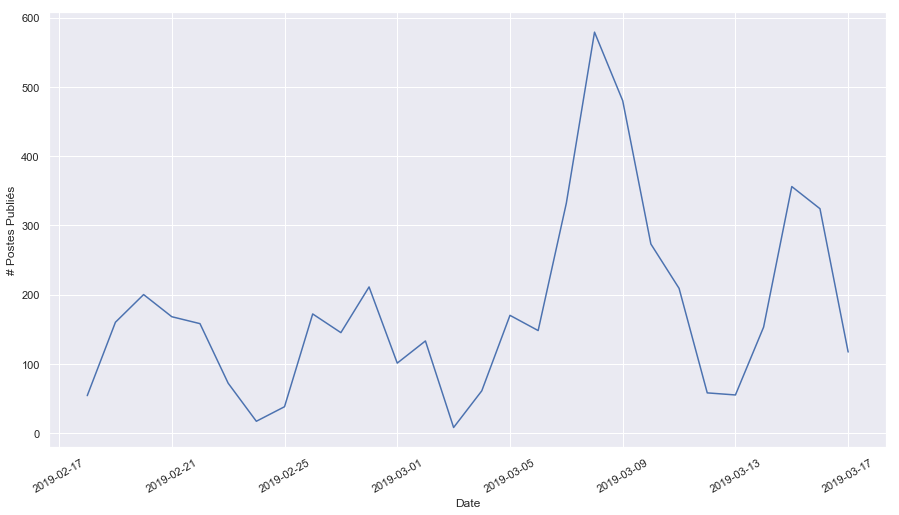

In [289]:
plt.figure(figsize=(15,8))
month_count_graph = sns.lineplot(x="Date", y="# Postes Publiés", markers=True, dashes=False, data=day_job_counts)
for item in month_count_graph.get_xticklabels():
    item.set_rotation(30)

In [290]:
df["position"].unique()

array(['analyst', nan, 'scientist', 'Developpeur',
       'Business_Intelligence'], dtype=object)

In [291]:
df["Position Type"] = df["position"].fillna("Miscellaneous")
#df["Position Type"] = df["Position Type"].str.replace(["Business_Intelligence", "analyst", "scientist"], 
#                                                     ["Business Intelligence", "Data Analyst", "Data Scientist"])

In [292]:
df.loc[df["Position Type"] == "analyst", "Position Type"] = "Data Analyst"
df.loc[df["Position Type"] == "scientist", "Position Type"] = "Data Scientist"
df.loc[df["Position Type"] == "Business_Intelligence", "Position Type"] = "Business Intelligence"


df["Position Type"].head()

0     Data Analyst
1     Data Analyst
2     Data Analyst
3     Data Analyst
5    Miscellaneous
Name: Position Type, dtype: object

In [293]:
dates_types = df[["vraie_date", "Position Type"]]
dates_types["Count"] = 1
dates_types["vraie_date"] = dates_types["vraie_date"].dt.date
#dates_types.groupby(by=dates_types.columns).sum()

jobby = dates_types.groupby(["vraie_date", "Position Type"]).count().reset_index()#.set_index(["vraie_date"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [294]:
jobby

,vraie_date,Position Type,Count
0,2018-10-11,Business Intelligence,2
1,2018-10-11,Data Analyst,35
2,2018-10-11,Data Scientist,4
3,2018-10-11,Developpeur,6
4,2018-10-11,Miscellaneous,2
5,2018-10-12,Business Intelligence,10
6,2018-10-12,Data Analyst,12
7,2018-10-12,Data Scientist,12
8,2018-10-12,Developpeur,52
9,2018-10-12,Miscellaneous,10


In [275]:
import itertools

vraie_date_col = pd.Series(pd.date_range(start=pd.datetime.today() - pd.Timedelta("28 days"), end=pd.datetime.today())).dt.date
pos_type_col = pd.Series(["Business Intelligence", "Data Analyst", "Data Scientist", "Developpeur", "Miscellaneous"])

def expand_grid(dct):
    rows = itertools.product(*dct.values())
    return pd.DataFrame.from_records(rows, columns=dct.keys())

In [295]:
pos_type_col

0    Business Intelligence
1             Data Analyst
2           Data Scientist
3              Developpeur
4            Miscellaneous
dtype: object

In [296]:
attempt = expand_grid({"date": vraie_date_col, "pos": pos_type_col})
attempt["Count2"] = 0
attempt2 = attempt.merge(jobby, how="left", left_on=["date", "pos"], right_on=["vraie_date", "Position Type"])
attempt3 = attempt2.drop(columns=["vraie_date", "Position Type"]).set_index(["date", "pos"])
date_pos_counts = attempt3.sum(axis=1)
date_pos_counts = date_pos_counts.reset_index()
date_pos_counts.columns = ["Date", "Position", "Number"]

bi_counts = date_pos_counts.loc[date_pos_counts["Position"] == "Business Intelligence"]
da_counts = date_pos_counts.loc[date_pos_counts["Position"] == "Data Analyst"]
ds_counts = date_pos_counts.loc[date_pos_counts["Position"] == "Data Scientist"]
de_counts = date_pos_counts.loc[date_pos_counts["Position"] == "Developpeur"]
mi_counts = date_pos_counts.loc[date_pos_counts["Position"] == "Miscellaneous"]

bi_counts = bi_counts.drop(columns=["Position"]).set_index("Date")
da_counts = da_counts.drop(columns=["Position"]).set_index("Date")
ds_counts = ds_counts.drop(columns=["Position"]).set_index("Date")
de_counts = de_counts.drop(columns=["Position"]).set_index("Date")
mi_counts = mi_counts.drop(columns=["Position"]).set_index("Date")

job_type_counts = pd.concat([de_counts, da_counts, ds_counts, bi_counts, mi_counts], axis=1)
job_type_counts.columns = ["Developpeur", "Data Analyst", "Data Scientist", "Business Intelligence", "Miscellaneous"]

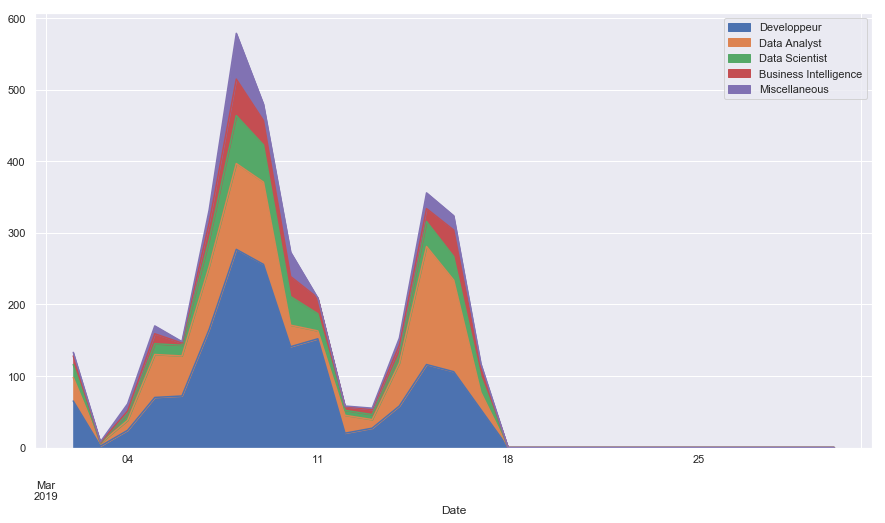

In [297]:
job_type_counts.plot.area(figsize=(15, 8))

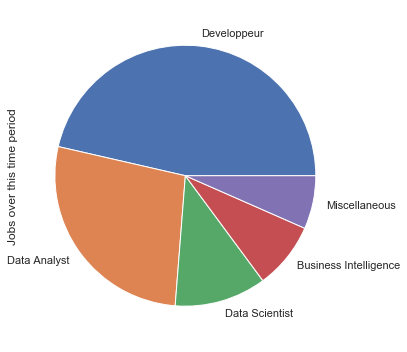

In [298]:
job_time_sum = job_type_counts.iloc[:,:].sum().to_frame() # For week, insert -7 before the first ':'
job_time_sum.columns = ["Jobs over this time period"]
job_time_sum.plot.pie(y="Jobs over this time period", figsize=(6,6), legend=False)#, title="Yay!")

In [299]:
df["Department"] = df["Location"].str.extract(r'(\d\d)', expand=False)

In [300]:
dept_to_region = {"Hauts-de-France": ['02', "60", "80", "62", "59"], "Normandie": ["50", "14", "61", "27", "76"],
                  "Bretagne": ["29", "22", "35", "56"], "Grand Est": ["08", "51", "10", "52", "55", "54", "57", "88", "67", "68"],
                  "Pays de la Loire": ["53", "44", "72", "49", "85"], "Paris": ["75"],
                  "Banlieues": ["78", "95", "77", "91", "92", "93", "94"], "Centre Val de Loire": ["28", "18", "36", "37", "41", "45"],
                   "Bourgogne-Franche-Comté": ["89", "58", "21", "71", "70", "90", "25", "39"], 
                   "Auvergne-Rhone-Alpes": ["03", "63", "15", "43", "42", "07", "69", "26", "38", "01", "74", "73"], 
                  "Nouvelle Aquitaine": ["79", "86", "16", "17", "23", "87", "19", "24", "33", "47", "40", "64"],
                   "Occitanie": ["46", "12", "82", "81", "31", "32", "09", "65", "48", "30", "34", "11", "66"], 
                   "PACA": ["05", "06", "04", "83", "84", "13"]}

In [301]:
def to_region(x):
    for region in dept_to_region.keys():
        if x in dept_to_region[region]:
            return region
    return np.nan

In [302]:
df["Region"] = df["Department"].apply(to_region)

In [303]:
df.head()

,Company,Date,Details,Location,Title,timestamp,url,stage,cdi,cdd,...,Niveau d'études,study,Bassin_emploi,Inner_City,langage,Langages,vraie_date,Position Type,Department,Region
0,Grant Thornton,il y a 2 jours,france :\r\r\nau sein du département audit par...,- neuilly-sur-seine (92),"alternant data analyst\r\r\ngrant thornton1,04...",2019-03-10,NaN,1,0,0,...,NaN,NaN,NaN,0,1,"statistique, excel, javascript, python, r, das...",2019-03-08,Data Analyst,92,Banlieues
1,Enedis,il y a 2 jours,"enedis est une entreprise de service public, g...",- nanterre (92),alternance - data engineer - h/f\r\r\nenedis37...,2019-03-10,NaN,1,0,0,...,5,5.0,NaN,0,1,"java, spark, hadoop, r, scala",2019-03-08,Data Analyst,92,Banlieues
2,soft.computing,il y a 2 jours,soft computing est leader de la data et du dig...,- paris (75),consultant data analyst\r\r\nsoft.computing8 a...,2019-03-10,NaN,1,0,0,...,bac+3,3.0,NaN,1,1,"statistique, machine learning, sas, c+, python, r",2019-03-08,Data Analyst,75,Paris
3,Synaltic,il y a 2 jours,data analyst tableau junior\r\r\nvous intervie...,- vincennes (94),data analyst tableau junior\r\r\nsynaltic - vi...,2019-03-10,NaN,0,1,0,...,"bac +5, bac + 3",5.0,NaN,0,1,"sql, r",2019-03-08,Data Analyst,94,Banlieues
5,Private,il y a 2 jours,behavior interventionist / behavior technician...,- paris (75),behavior interventionist / aba therapist for c...,2019-03-10,NaN,0,1,0,...,NaN,NaN,NaN,1,0,r,2019-03-08,Miscellaneous,75,Paris


In [310]:
past_month = df.loc[(pd.datetime.today() - df["vraie_date"]).dt.days <= 28]

job_place_sum = past_month.set_index("vraie_date")["Region"].value_counts().reset_index()
job_place_sum.columns = ["Region", "Offres"]
job_place_sum

#job_place_sum = job_type_counts.iloc[:,:].sum().to_frame() # For week, insert -7 before the first ':'
#job_time_sum.columns = ["Jobs over this time period"]
#job_time_sum.plot.pie(y="Jobs over this time period", figsize=(6,6), legend=False)#, title="Yay!")

,Region,Offres
0,Paris,731
1,Pays de la Loire,652
2,Occitanie,560
3,Banlieues,504
4,Nouvelle Aquitaine,490
5,Auvergne-Rhone-Alpes,275
6,PACA,18
7,Grand Est,11
8,Normandie,9
9,Centre Val de Loire,5
